##**GSLC Machine Learning**  
Miecel Alicia Angel J - 2702327601


**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import spearmanr
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

**Read the Dataset**

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.drop(columns=['customer_id'], inplace=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The code removes the 'customer_id' column from the DataFrame df because it doesn't contribute meaningfully to the predictive or analytical process. Since customer IDs are not correlated with the target variable or other features, the column is dropped to avoid introducing irrelevant information into the model. The change is applied in place, meaning the original DataFrame is updated. Afterward, df.head() displays the first five rows of the modified DataFrame.

###**1. Data Preprocessing**

**Check for Duplicates and Missing Values**

In [6]:
print(f'Duplicates : {df.duplicated().sum()}')

print(f'Missing Values :\n{df.isna().sum()}')

Duplicates : 0
Missing Values :
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


There aren't any duplicates and missing values, hence further handling is uneccessary.

**Encoding Categorical Variables**

In [7]:
cat_cols = []
num_cols = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['country', 'gender']
Numeric: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


The code separates the columns of the DataFrame df into categorical and numeric columns based on their data types. It starts by initializing two empty lists, cat_cols for categorical columns and num_cols for numeric columns. It then loops through each column in the DataFrame. For each column, it checks if the data type is either integer (int) or float by converting the data type to a string. If the column is numeric, its name is appended to the num_cols list; otherwise, it's added to the cat_cols list, indicating it is categorical. Finally, the code prints the lists of categorical and numeric columns, providing an organized way to differentiate between feature types for further analysis or preprocessing.

Label Encoding for column 'gender'

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


The code performs label encoding to convert the categorical 'gender' column in the DataFrame df into numeric values. It begins by importing the preprocessing module from scikit-learn and initializing a LabelEncoder object. The LabelEncoder is then applied to the 'gender' column using the fit_transform() method, which assigns a unique numeric value to each unique category in the column (e.g., converting 'Male' and 'Female' into 0 and 1). After this transformation, the DataFrame is updated.

One-Hot Encoding for column 'country'

In [9]:
df = pd.get_dummies(df, dtype=int)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


The code applies one-hot encoding to the DataFrame df using the pd.get_dummies() function, converting all categorical variables into binary columns. Each unique category in the original columns is transformed into a new column containing 1s and 0s, where 1 indicates the presence of the category. The dtype=int parameter ensures that the new columns are of integer type. After the transformation, the DataFrame is updated.

**Split Data into Features and Target, Train-Test Split**

In [10]:
X = df.drop(columns=['churn'])
y = df['churn']

The code separates the features and the target variable from the DataFrame df for use in a machine learning model. It creates a new DataFrame X by dropping the 'churn' column, which contains the target variable, from df, meaning X now holds all the feature columns to be used for training. Meanwhile, the line assigning y = df['churn'] captures the 'churn' column as the target variable, representing the outcome to be predicted (e.g., whether a customer has churned or not). Together, X contains the input features, and y contains the corresponding target values, effectively preparing the data for model training.

**Train-Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X and y are the feature set and target variable, respectively.  

test_size=0.2 indicates that 20% of the data will be reserved for testing, while 80% will be used for training the model.  

random_state=42 ensures reproducibility by controlling the random seed, so the split will be the same each time the code is run.  

After executing this line, X_train and y_train contain the training data, while X_test and y_test hold the test data, enabling proper evaluation of the model's performance.

**Feature Scaling using RobustScaler**

In [12]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


The code scales the feature data using the RobustScaler from the sklearn.preprocessing module, which is robust to outliers. First, scaler = RobustScaler() initializes the scaler object. Then, X_train_scaled = scaler.fit_transform(X_train) fits the scaler to the training data and transforms it, creating a scaled version of the training set. The line X_test_scaled = scaler.transform(X_test) applies the same transformation to the test set without refitting the scaler, ensuring that the test data is scaled based on the training data's statistics. After these operations, the features in X_train_scaled and X_test_scaled are now on a similar scale, which is important for improving the performance of machine learning models.

###**2. Exploratory Data Analysis (EDA)**

**Visualize Distributions of Numeric Features**

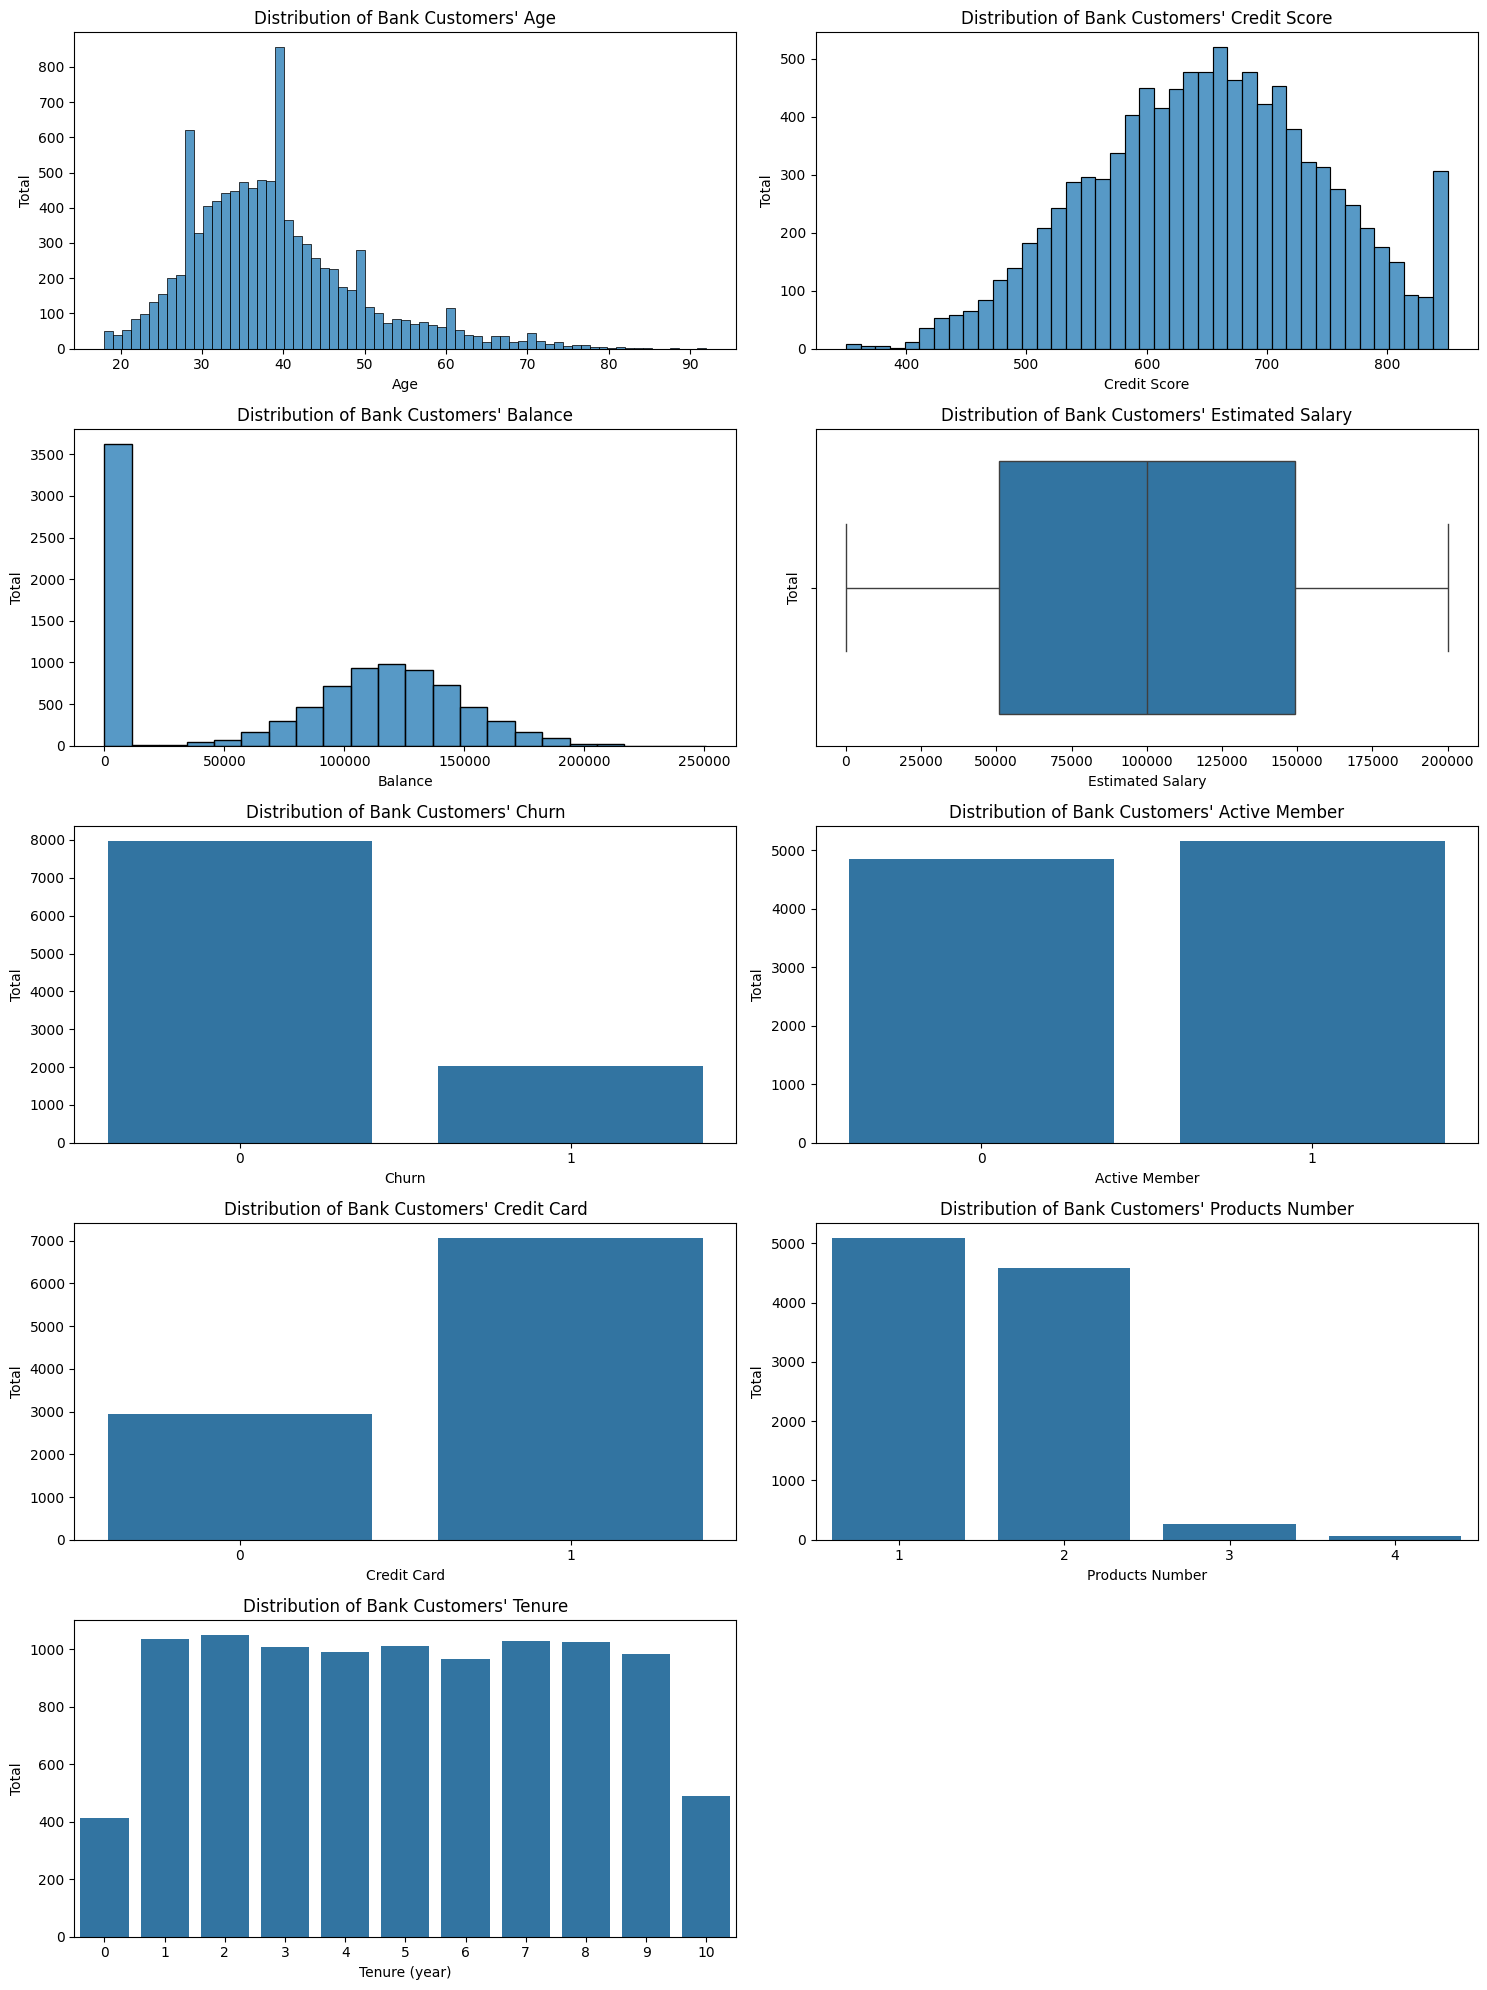

In [13]:
plt.figure(figsize=(15, 20))

plt.subplot(5, 2, 1)
sns.histplot(x=df['age'])
plt.title("Distribution of Bank Customers' Age")
plt.xlabel("Age")
plt.ylabel("Total")

plt.subplot(5, 2, 2)
sns.histplot(x=df['credit_score'])
plt.title("Distribution of Bank Customers' Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Total")

plt.subplot(5, 2, 3)
sns.histplot(x=df['balance'])
plt.title("Distribution of Bank Customers' Balance")
plt.xlabel("Balance")
plt.ylabel("Total")

plt.subplot(5, 2, 4)
sns.boxplot(x=df['estimated_salary'])
plt.title("Distribution of Bank Customers' Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Total")

plt.subplot(5, 2, 5)
sns.countplot(x = df['churn'])
plt.title("Distribution of Bank Customers' Churn")
plt.xlabel("Churn")
plt.ylabel("Total")

plt.subplot(5, 2, 6)
sns.countplot(x = df['active_member'])
plt.title("Distribution of Bank Customers' Active Member")
plt.xlabel("Active Member")
plt.ylabel("Total")

plt.subplot(5, 2, 7)
sns.countplot(x = df['credit_card'])
plt.title("Distribution of Bank Customers' Credit Card")
plt.xlabel("Credit Card")
plt.ylabel("Total")

plt.subplot(5, 2, 8)
sns.countplot(x = df['products_number'])
plt.title("Distribution of Bank Customers' Products Number")
plt.xlabel("Products Number")
plt.ylabel("Total")

plt.subplot(5, 2, 9)
sns.countplot(x = df['tenure'])
plt.title("Distribution of Bank Customers' Tenure")
plt.xlabel("Tenure (year)")
plt.ylabel("Total")

plt.tight_layout()
plt.show()

It creates a figure with a size of 15 by 20 inches and arranges multiple subplots in a 5x2 grid. Each subplot displays different visualizations, such as histograms for continuous variables like age, credit score, and balance, and boxplots for the estimated salary. Additionally, count plots are used to show the distribution of categorical variables like churn, active membership, credit card ownership, number of products, and tenure. The plt.tight_layout() function is called to ensure that the subplots are neatly spaced without overlapping, and plt.show() displays the final visualizations.

**Visualize Categorical Features**

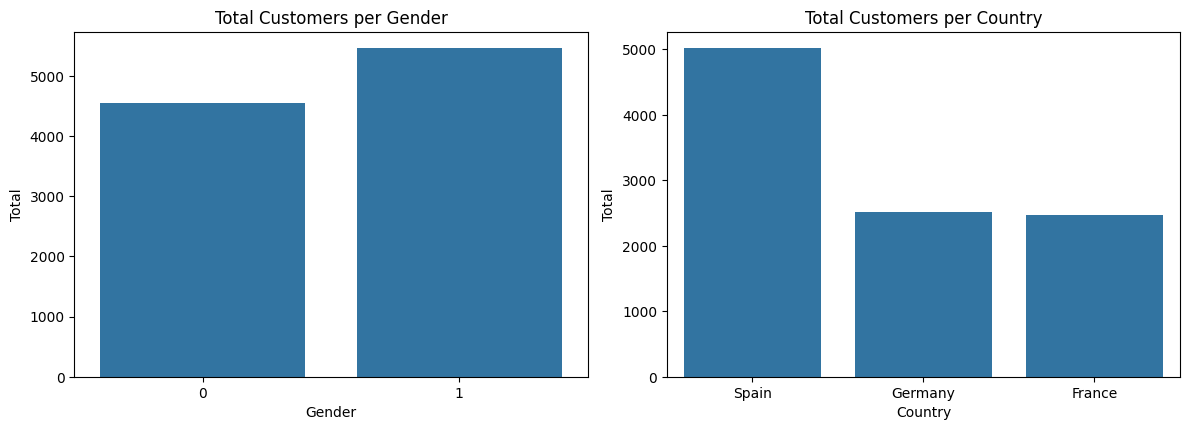

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x=df['gender'])
plt.title("Total Customers per Gender")
plt.xlabel("Gender")
plt.ylabel("Total")

melted_df = pd.melt(df, value_vars=['country_Spain', 'country_Germany', 'country_France'],
                    var_name='Country', value_name='Count')
count_data = melted_df[melted_df['Count'] == 1].groupby('Country').size().reset_index(name='Total')

plt.subplot(2, 2, 2)
sns.barplot(data=count_data, x='Country', y='Total')
plt.title("Total Customers per Country")
plt.xlabel("Country")
plt.ylabel("Total")
plt.xticks(ticks=[0, 1, 2], labels=['Spain', 'Germany', 'France'])

plt.tight_layout()
plt.show()

In the first subplot, sns.countplot(x=df['gender']) generates a count plot showing the total number of customers for each gender, labeled with appropriate titles and axes.

In the second subplot, the code first reshapes the DataFrame df using pd.melt() to focus on specific country columns (Spain, Germany, and France). It then groups this melted data to count the number of customers from each country where the count is equal to 1, resulting in a new DataFrame called count_data. A bar plot is created with sns.barplot() to display the total number of customers per country, with customized x-axis ticks for better readability.

Finally, plt.tight_layout() ensures the subplots are neatly arranged without overlapping, and plt.show() displays the visualizations. This provides insights into customer demographics and geographical distribution.

**Analyze Correlation between Features**

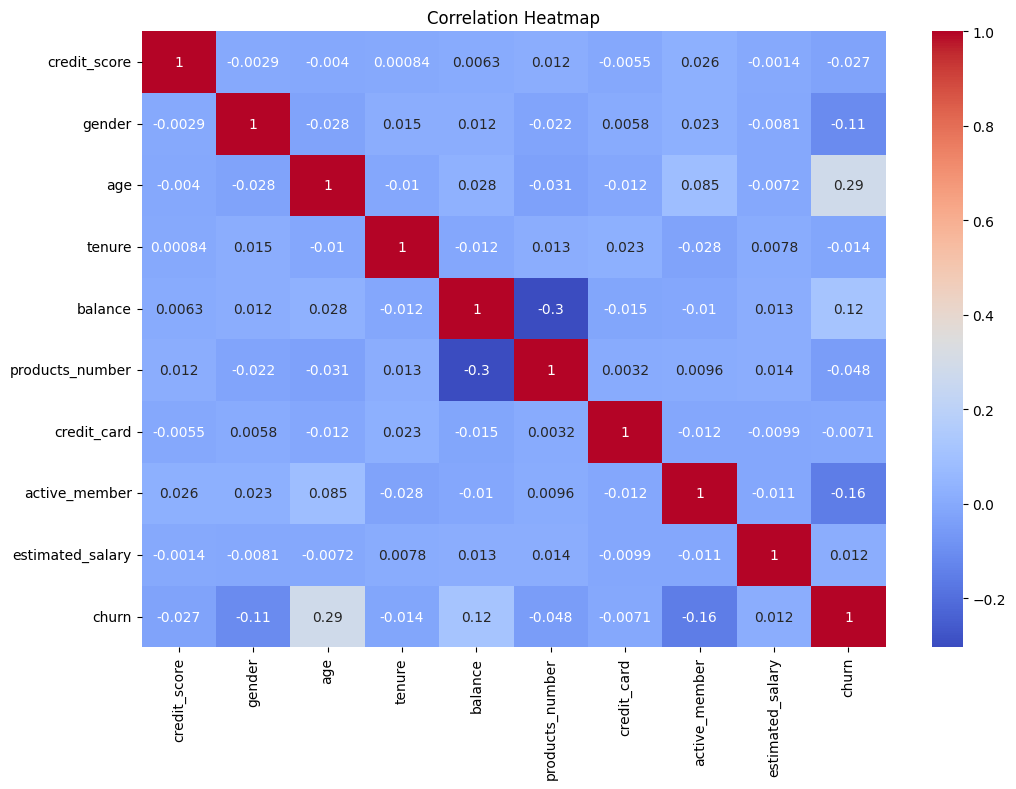

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
categorical_columns_encoded = [col for col in df_encoded.columns if 'country_' in col or 'gender_' in col]

df_heatmap = df_encoded.drop(categorical_columns_encoded, axis=1)

corr_matrix = df_heatmap.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This code performs one-hot encoding on the DataFrame df using pd.get_dummies(), creating a new DataFrame df_encoded while dropping the first category to avoid multicollinearity. It identifies the encoded categorical columns related to 'country_' and 'gender_' and stores them in the list categorical_columns_encoded. The code then drops these columns from df_encoded to focus on the remaining numeric features, resulting in the df_heatmap DataFrame. A correlation matrix is computed using df_heatmap.corr(), which quantifies the relationships between the numeric variables.

Finally, a heatmap is generated using sns.heatmap(), displaying the correlation coefficients with annotations and a color gradient from the 'coolwarm' palette.

**Analyze Relationships with Target Variable**

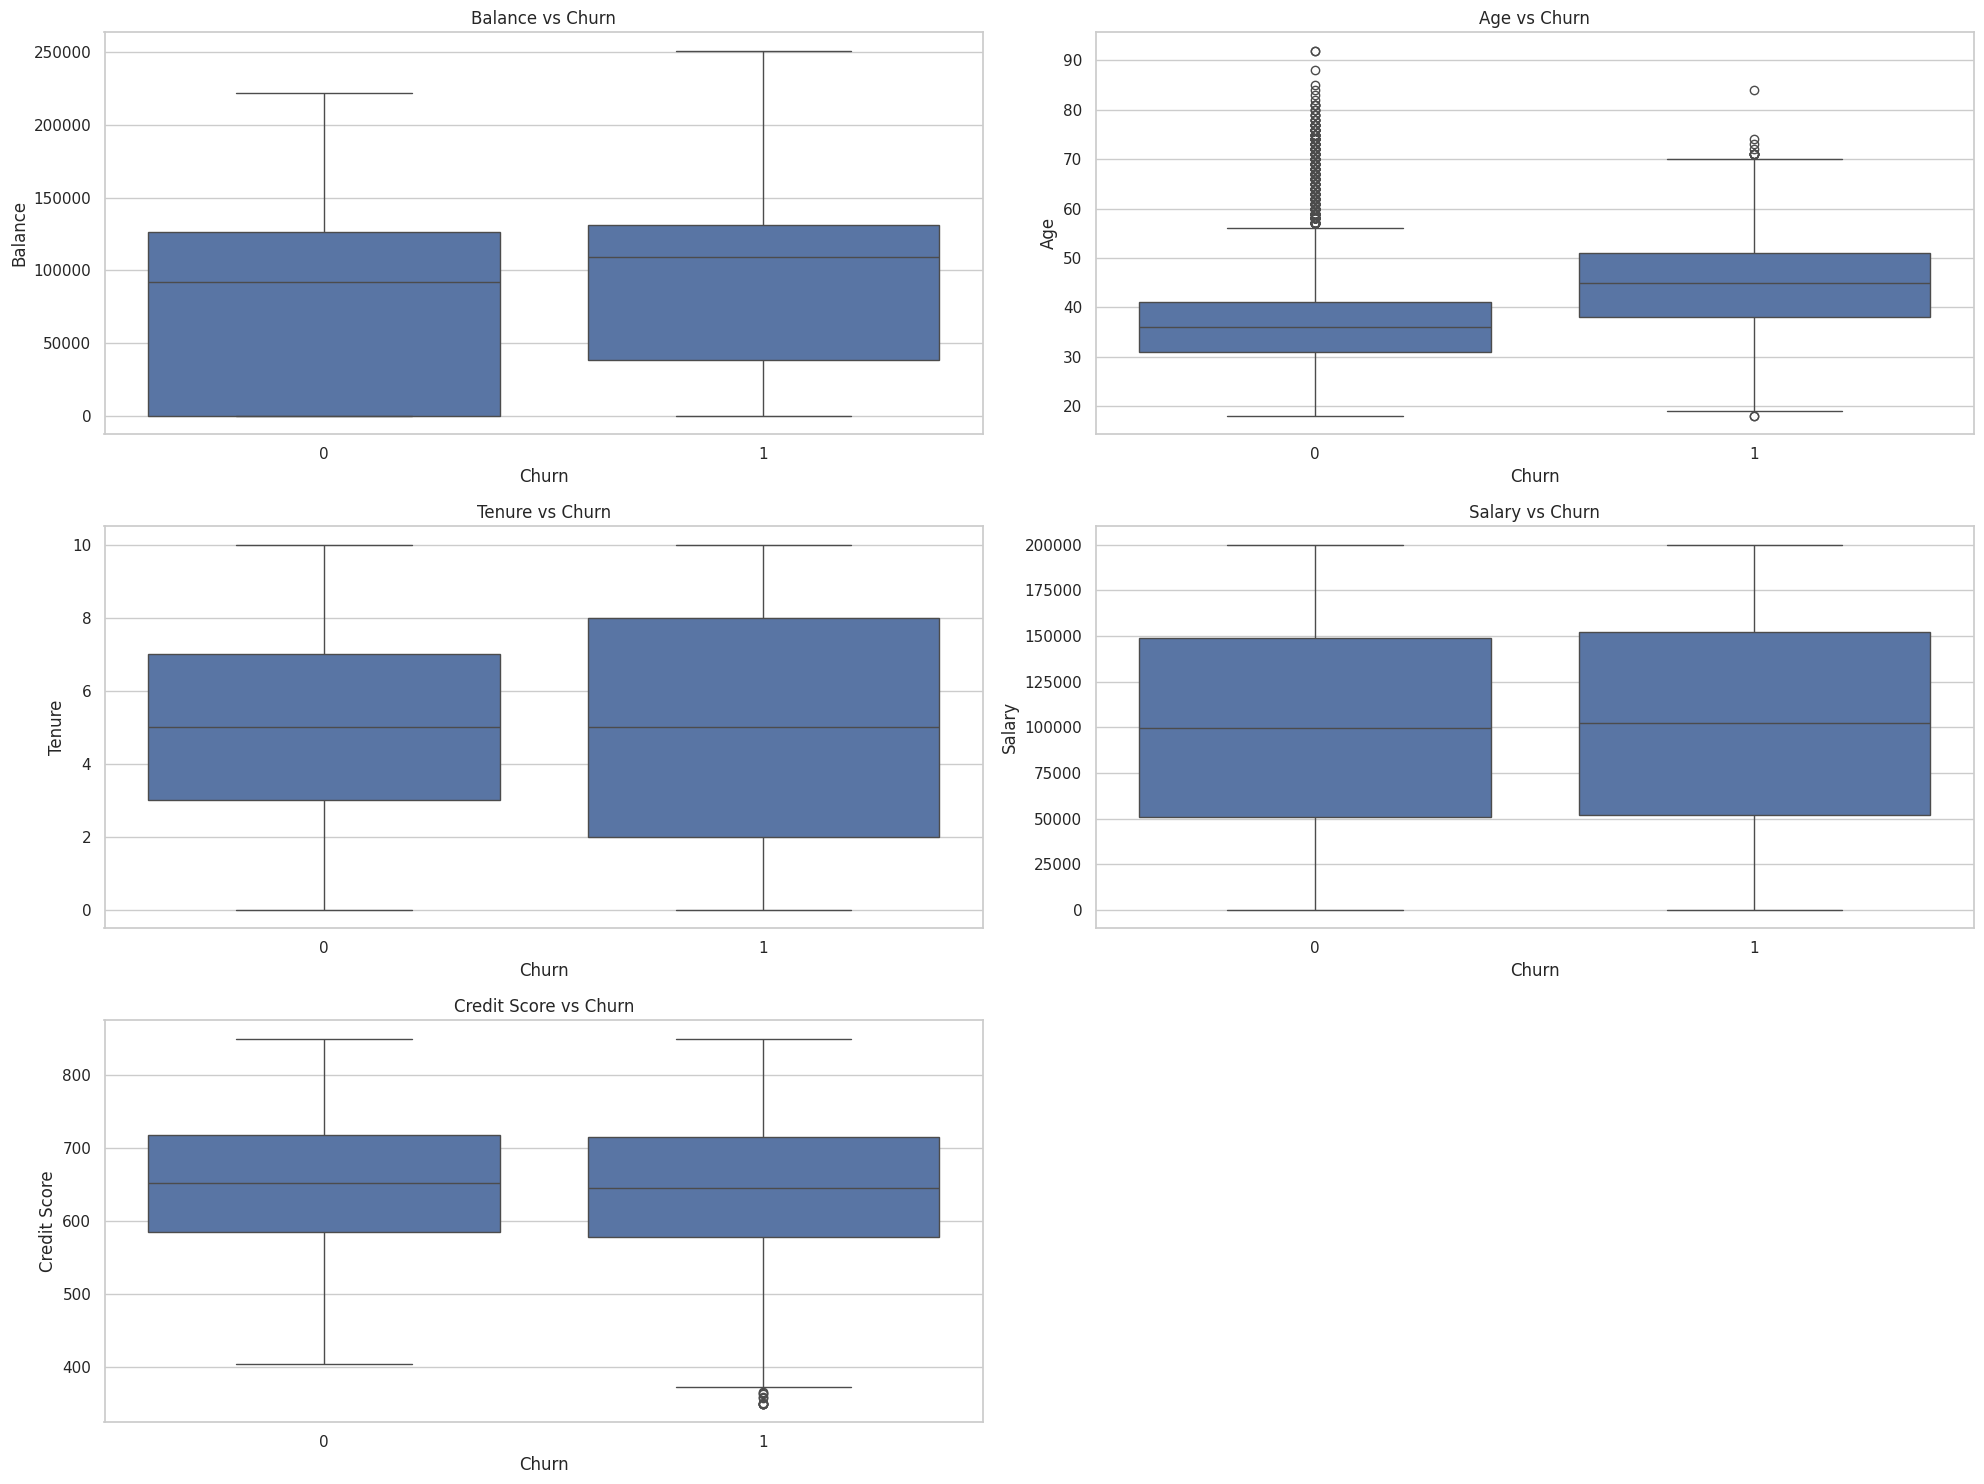

In [16]:
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# 1. Boxplot for Balance vs Churn
sns.boxplot(x='churn', y='balance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Balance vs Churn')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Balance')

# 2. Boxplot for Age vs Churn
sns.boxplot(x='churn', y='age', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Churn')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Age')

# 3. Boxplot for Duration vs Churn
sns.boxplot(x='churn', y='tenure', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Tenure vs Churn')
axes[1, 0].set_xlabel('Churn')
axes[1, 0].set_ylabel('Tenure')

# 4. Boxplot for Salary vs Churn
sns.boxplot(x='churn', y='estimated_salary', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Salary vs Churn')
axes[1, 1].set_xlabel('Churn')
axes[1, 1].set_ylabel('Salary')

# 5. Boxplot for Credit Score vs Churn
sns.boxplot(x='churn', y='credit_score', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Credit Score vs Churn')
axes[2, 0].set_xlabel('Churn')
axes[2, 0].set_ylabel('Credit Score')

axes[2, 1].axis('off')
plt.tight_layout()
plt.show()

The resulting boxplots visually represent the distribution of each feature (balance, age, tenure, estimated salary, and credit score) segmented by churn status (e.g., whether a customer has churned or not). Each boxplot displays the median, quartiles, and potential outliers, allowing for easy comparison of these features across churn categories. This helps in identifying trends and potential relationships, which can inform further analysis and model building. For instance, if one boxplot shows a significant difference in distributions between churned and non-churned customers, it suggests that the feature may be relevant for predicting churn.

**Model Training & ROC Curves**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Probabilities dictionary keys: dict_keys(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'K-Nearest Neighbors', 'GaussianNB'])


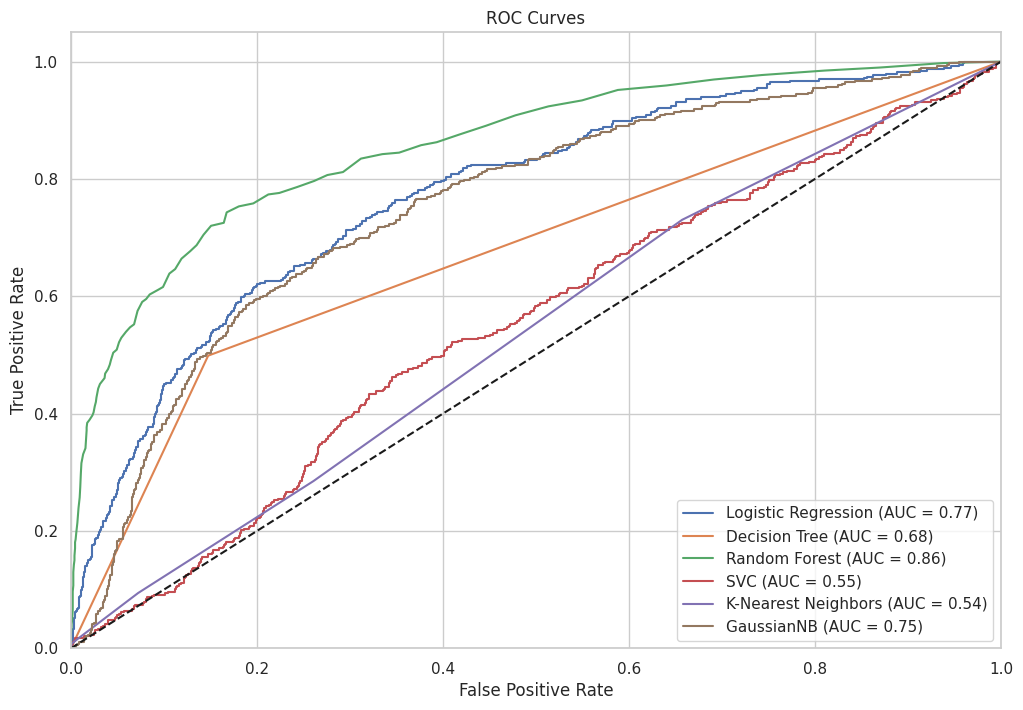


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.21      0.31       393

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000


Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.33      0.07      0.11       393

    accuracy                           0.79      2000
   macro avg       0.57      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



In [17]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
}

probabilities = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    probabilities[name] = model.predict_proba(X_test)[:, 1]

print("Probabilities dictionary keys:", probabilities.keys())

# buat ROC
plt.figure(figsize=(12, 8))

for name in models.keys():
    if name in probabilities:
        fpr, tpr, _ = roc_curve(y_test, probabilities[name])
        # buat hitung AUC
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Warning: No probabilities found for {name}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, predictions))

It defines a dictionary of classifiers, including Logistic Regression, Decision Tree, Random Forest, SVC, K-Nearest Neighbors, and GaussianNB. Each model is trained on the training set, and the predicted probabilities for the positive class are stored in the probabilities dictionary.

Next, ROC curves are plotted for each model, showing the trade-off between the true positive rate and the false positive rate. The area under the curve (AUC) is calculated to quantify model performance, with higher values indicating better discrimination ability.

###**3. Perform fine-tuning using GridSearchCV**

In [18]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

best_models = {}
probabilities = {}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_search_rf.best_estimator_

probabilities['Random Forest'] = best_models['Random Forest'].predict_proba(X_test)[:, 1]

predictions_rf = best_models['Random Forest'].predict(X_test)
print(f"\nRandom Forest:")
print(classification_report(y_test, predictions_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



1. Parameter Grid Definition: A dictionary param_grid_rf is defined, specifying the hyperparameters to tune for the Random Forest model. It includes:  

a. n_estimators: The number of trees in the forest (50 or 100).  

b. max_depth: The maximum depth of the trees (None for unlimited depth or 10).
  
c. min_samples_split: The minimum number of samples required to split an internal node (set to 2).
  
    
2. Grid Search and Model Selection: GridSearchCV is instantiated with the Random Forest classifier, the parameter grid, 3-fold cross-validation, and the scoring metric set to roc_auc. The model is trained on the training set (X_train, y_train), and the best model is stored in the best_models dictionary.  
3. Probability Prediction: The probabilities for the positive class from the best Random Forest model are predicted for the test set (X_test) and stored in the probabilities dictionary.  

4. Model Predictions and Evaluation: Finally, predictions are made on the test set, and a classification report is printed, detailing metrics such as precision, recall, F1-score, and support for each class.  

**Random Forest is a robust ensemble method that reduces overfitting by averaging predictions from multiple decision trees.** It captures complex relationships in data, identifies key features, and works well with both categorical and numerical data. Its scalability and effectiveness for large datasets make it an excellent choice for tasks like predicting customer churn.

###**4. Explain what is the ROC curve and what does it tell us about a classification model's performance**

**ROC Curve** stands for Receiver Operating Characteristic curve, which is a graphical plot used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

**AUC (Area Under the Curve)** measures the area under the ROC curve, which indicates how well the model is distinguishing between classes. An AUC of 0.5 suggests a random model, while an AUC closer to 1 indicates a highly capable model.

###**5. One taboo in ML is fitting scalers and encoders to the whole dataset. Why?**

Fitting scalers and encoders to the whole dataset is considered a bad practice because it can lead to **data leakage**.  
When scaling or encoding is done on the entire dataset before splitting, information from the test set can influence the scaling factors (e.g., mean and variance), resulting in over-optimistic model performance. This is why we fit the scalers only on the training set and then apply them to the test set.

###**6. Tell me a joke related to Machine Learning**

Why did the model break up with its dataset?

Because it found someone less biased! 😄 hihihi

Lastly, wanted to say sorry if my work has not met your expectation. I did my best, but I know there might be some things that need improvement :>